# Groundwater head data curation
This notebook describes setting up of groundwater head data for use with OLPROC.

## Background

## Aim and purpose
The purpose of this notebook is to curate raw head data for use with OLPROC. This notebook must be run before the notebook that curates `head-stage differences`.

Essential imports:

In [1]:
import os
import numpy as np
import pandas as pd
import pyemu
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'font.size': 14})

In [2]:
data_dir = os.path.join('..', '..', 'data', 'raw_data', 'head')
obs_dir =  os.path.join('..', '..', 'data', 'observations')
assert(data_dir)
assert(obs_dir)

In [3]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'B10-1.csv',
 'B14-1.csv',
 'B15-1.csv',
 'B16-1.csv',
 'B2-1.csv',
 'B22-1.csv',
 'B26.csv',
 'B29.csv',
 'B34.csv',
 'B35.csv',
 'B36.csv',
 'B37.csv',
 'B4.csv',
 'B8-2.csv',
 'B9-2.csv',
 'KB1-1.csv',
 'KB4-3.csv',
 'NI1403-2.csv',
 'NI1404-1.csv',
 'NI1405-1.csv',
 'NI1407-2.csv',
 'NI1408-1.csv',
 'NI1409-1.csv',
 'NI1410-1.csv',
 'NI1412-1.csv',
 'NI15-O1.csv',
 'NI15-O44.csv',
 'NI15-O46.csv',
 'NI15-O47.csv',
 'NI15-O48.csv',
 'NI1501-3.csv',
 'NI1502-2.csv',
 'NI1504-2.csv',
 'NI1505-2.csv',
 'NI1506-1.csv',
 'NI1507-2.csv',
 'NI1601-3.csv',
 'NI1602-1.csv',
 'NI1603-1.csv',
 'NI1605-1.csv',
 'NI1606-1.csv',
 'NI1607-2.csv',
 'NI1608-1.csv',
 'NI1609-2.csv',
 'NI1610-2.csv',
 'NI1611-1.csv',
 'NI1612-1.csv',
 'NI1613-1.csv',
 'NI1701-1.csv',
 'NI1702-1.csv',
 'NI1703-1.csv',
 'NI1704-1.csv',
 'NI1705-1.csv',
 'NI1706-1.csv',
 'NI1707-1.csv',
 'NI1708-1.csv',
 'NI1709-1.csv',
 'NI1711-1.csv',
 'NI1712-1.csv',
 'NI1801-1.csv',
 'NI1802-1.csv',
 'NI1803-1

Load up the raw data:

In [4]:
head_data = {}

In [5]:
for file in os.listdir(data_dir):
    if '.csv' in file:
        head_data[file.replace('.csv', '')] = pd.read_csv(os.path.join(data_dir, file))

In [6]:
#df_test = pd.read_csv(os.path.join(data_dir, 'NI15-O44.csv'))

In [7]:
#df_test['head']

In [8]:
for key,value in head_data.items():
    print(f'No. rows in {key}: {len(value)}')

No. rows in B10-1: 5
No. rows in B14-1: 3
No. rows in B15-1: 4
No. rows in B16-1: 3
No. rows in B2-1: 6347
No. rows in B22-1: 4
No. rows in B26: 4
No. rows in B29: 3
No. rows in B34: 4
No. rows in B35: 320
No. rows in B36: 320
No. rows in B37: 1899
No. rows in B4: 3
No. rows in B8-2: 6
No. rows in B9-2: 5
No. rows in KB1-1: 2971
No. rows in KB4-3: 2020
No. rows in NI1403-2: 3
No. rows in NI1404-1: 5
No. rows in NI1405-1: 3
No. rows in NI1407-2: 4
No. rows in NI1408-1: 3
No. rows in NI1409-1: 1
No. rows in NI1410-1: 4
No. rows in NI1412-1: 328
No. rows in NI15-O1: 6079
No. rows in NI15-O44: 5728
No. rows in NI15-O46: 3310
No. rows in NI15-O47: 2004
No. rows in NI15-O48: 6331
No. rows in NI1501-3: 3059
No. rows in NI1502-2: 4
No. rows in NI1504-2: 4
No. rows in NI1505-2: 3
No. rows in NI1506-1: 2
No. rows in NI1507-2: 5
No. rows in NI1601-3: 4
No. rows in NI1602-1: 4
No. rows in NI1603-1: 979
No. rows in NI1605-1: 1021
No. rows in NI1606-1: 3
No. rows in NI1607-2: 1021
No. rows in NI1608

Ensure datetime columns contain actual datetime values

In [9]:
for key,value in head_data.items():
    print(key)
    head_data[key]['datetime'] = pd.to_datetime(head_data[key]['datetime'])
    head_data[key]['head'] = head_data[key]['head'].replace('\t', '')
    head_data[key]['head'] = head_data[key]['head'].astype(float)

B10-1
B14-1
B15-1
B16-1
B2-1
B22-1
B26
B29
B34
B35
B36
B37
B4
B8-2
B9-2
KB1-1
KB4-3
NI1403-2
NI1404-1
NI1405-1
NI1407-2
NI1408-1
NI1409-1
NI1410-1
NI1412-1
NI15-O1
NI15-O44
NI15-O46
NI15-O47
NI15-O48
NI1501-3
NI1502-2
NI1504-2
NI1505-2
NI1506-1
NI1507-2
NI1601-3
NI1602-1
NI1603-1
NI1605-1
NI1606-1
NI1607-2
NI1608-1
NI1609-2
NI1610-2
NI1611-1
NI1612-1
NI1613-1
NI1701-1
NI1702-1
NI1703-1
NI1704-1
NI1705-1
NI1706-1
NI1707-1
NI1708-1
NI1709-1
NI1711-1
NI1712-1
NI1801-1
NI1802-1
NI1803-1
NI1804-1


### Visualize the data
Let's visualize the raw data just to familiarize ourselves with it:

In [10]:
df = pd.concat(head_data).reset_index()
df.rename(columns={'level_0': 'site'}, inplace=True) # Rename the column

In [11]:
df.loc[df['datetime'].astype(str).str.contains('NaT')]['site'].unique()

array(['B37', 'NI1605-1', 'NI1802-1'], dtype=object)

Plotting B10-1
Plotting B14-1
Plotting B15-1
Plotting B16-1
Plotting B2-1
Plotting B22-1
Plotting B26
Plotting B29
Plotting B34
Plotting B35
Plotting B36
Plotting B37
Plotting B4
Plotting B8-2
Plotting B9-2
Plotting KB1-1
Plotting KB4-3
Plotting NI1403-2
Plotting NI1404-1
Plotting NI1405-1
Plotting NI1407-2
Plotting NI1408-1
Plotting NI1409-1
Plotting NI1410-1
Plotting NI1412-1
Plotting NI15-O1
Plotting NI15-O44
Plotting NI15-O46
Plotting NI15-O47
Plotting NI15-O48
Plotting NI1501-3
Plotting NI1502-2
Plotting NI1504-2
Plotting NI1505-2
Plotting NI1506-1
Plotting NI1507-2
Plotting NI1601-3
Plotting NI1602-1
Plotting NI1603-1
Plotting NI1605-1
Plotting NI1606-1
Plotting NI1607-2
Plotting NI1608-1
Plotting NI1609-2
Plotting NI1610-2
Plotting NI1611-1
Plotting NI1612-1
Plotting NI1613-1
Plotting NI1701-1
Plotting NI1702-1
Plotting NI1703-1
Plotting NI1704-1
Plotting NI1705-1
Plotting NI1706-1
Plotting NI1707-1
Plotting NI1708-1
Plotting NI1709-1
Plotting NI1711-1
Plotting NI1712-1
Plotting

<ipython-input-12-9f1a619cb2f1>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


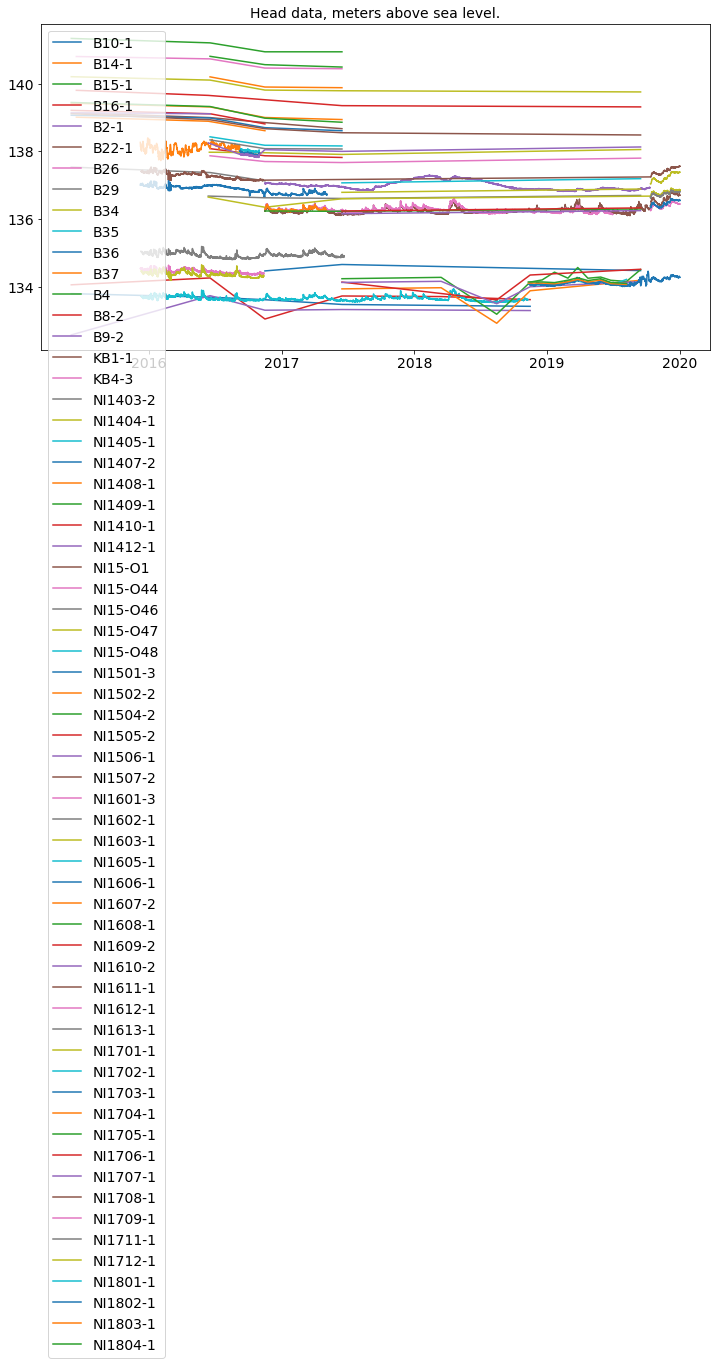

In [12]:
plt.figure(figsize=(12, 6))
for site in df['site'].unique():
    print(f'Plotting {site}')
    x = df.loc[df['site'] == site]['datetime']
    y = df.loc[df['site'] == site]['head']
    plt.plot(x, y, label=site)
plt.legend()
plt.title('Head data, meters above sea level.', fontsize=14)
plt.tight_layout()

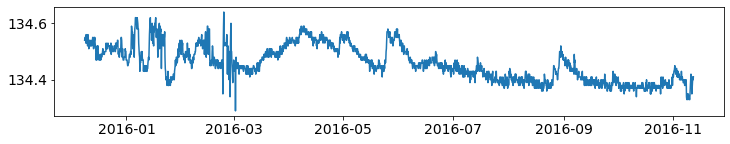

In [13]:
plt.figure(figsize=(12,2))
plt.plot(df.loc[df['site'] == 'KB4-3']['datetime'], df.loc[df['site'] == 'KB4-3']['head'])

### Resample head data
Resample the data into daily average values:

In [14]:
head_data_resamp = {}

In [15]:
for site, dataframe in head_data.items():
    print(f'Resampling: {site}')
    head_data_resamp[site] = dataframe.resample('d', on='datetime').mean().dropna(how='all')

Resampling: B10-1
Resampling: B14-1
Resampling: B15-1
Resampling: B16-1
Resampling: B2-1
Resampling: B22-1
Resampling: B26
Resampling: B29
Resampling: B34
Resampling: B35
Resampling: B36
Resampling: B37
Resampling: B4
Resampling: B8-2
Resampling: B9-2
Resampling: KB1-1
Resampling: KB4-3
Resampling: NI1403-2
Resampling: NI1404-1
Resampling: NI1405-1
Resampling: NI1407-2
Resampling: NI1408-1
Resampling: NI1409-1
Resampling: NI1410-1
Resampling: NI1412-1
Resampling: NI15-O1
Resampling: NI15-O44
Resampling: NI15-O46
Resampling: NI15-O47
Resampling: NI15-O48
Resampling: NI1501-3
Resampling: NI1502-2
Resampling: NI1504-2
Resampling: NI1505-2
Resampling: NI1506-1
Resampling: NI1507-2
Resampling: NI1601-3
Resampling: NI1602-1
Resampling: NI1603-1
Resampling: NI1605-1
Resampling: NI1606-1
Resampling: NI1607-2
Resampling: NI1608-1
Resampling: NI1609-2
Resampling: NI1610-2
Resampling: NI1611-1
Resampling: NI1612-1
Resampling: NI1613-1
Resampling: NI1701-1
Resampling: NI1702-1
Resampling: NI1703-1

In [16]:
print('Data points after resampling to daily averages...')
for key,value in head_data_resamp.items():
    print(f'No. rows in {key}: {len(value)}')

Data points after resampling to daily averages...
No. rows in B10-1: 5
No. rows in B14-1: 3
No. rows in B15-1: 4
No. rows in B16-1: 3
No. rows in B2-1: 1060
No. rows in B22-1: 4
No. rows in B26: 4
No. rows in B29: 3
No. rows in B34: 4
No. rows in B35: 54
No. rows in B36: 54
No. rows in B37: 272
No. rows in B4: 3
No. rows in B8-2: 6
No. rows in B9-2: 5
No. rows in KB1-1: 419
No. rows in KB4-3: 341
No. rows in NI1403-2: 3
No. rows in NI1404-1: 5
No. rows in NI1405-1: 3
No. rows in NI1407-2: 4
No. rows in NI1408-1: 3
No. rows in NI1409-1: 1
No. rows in NI1410-1: 4
No. rows in NI1412-1: 59
No. rows in NI15-O1: 1018
No. rows in NI15-O44: 957
No. rows in NI15-O46: 557
No. rows in NI15-O47: 339
No. rows in NI15-O48: 1064
No. rows in NI1501-3: 515
No. rows in NI1502-2: 4
No. rows in NI1504-2: 4
No. rows in NI1505-2: 3
No. rows in NI1506-1: 2
No. rows in NI1507-2: 5
No. rows in NI1601-3: 4
No. rows in NI1602-1: 4
No. rows in NI1603-1: 85
No. rows in NI1605-1: 1
No. rows in NI1606-1: 3
No. rows 

In [17]:
df_resampled = pd.concat(head_data_resamp).reset_index()
df_resampled.rename(columns={'level_0': 'site'}, inplace=True) # Rename the column

### Visualize both raw and processed data
Lines in color show raw data. Black lines show daily average data. It is the daily average data that will be used as input for OLPROC, as well as for comparison with head data for each individual site.

Text(0.5, 1.0, 'Head data, meters above sea level.')

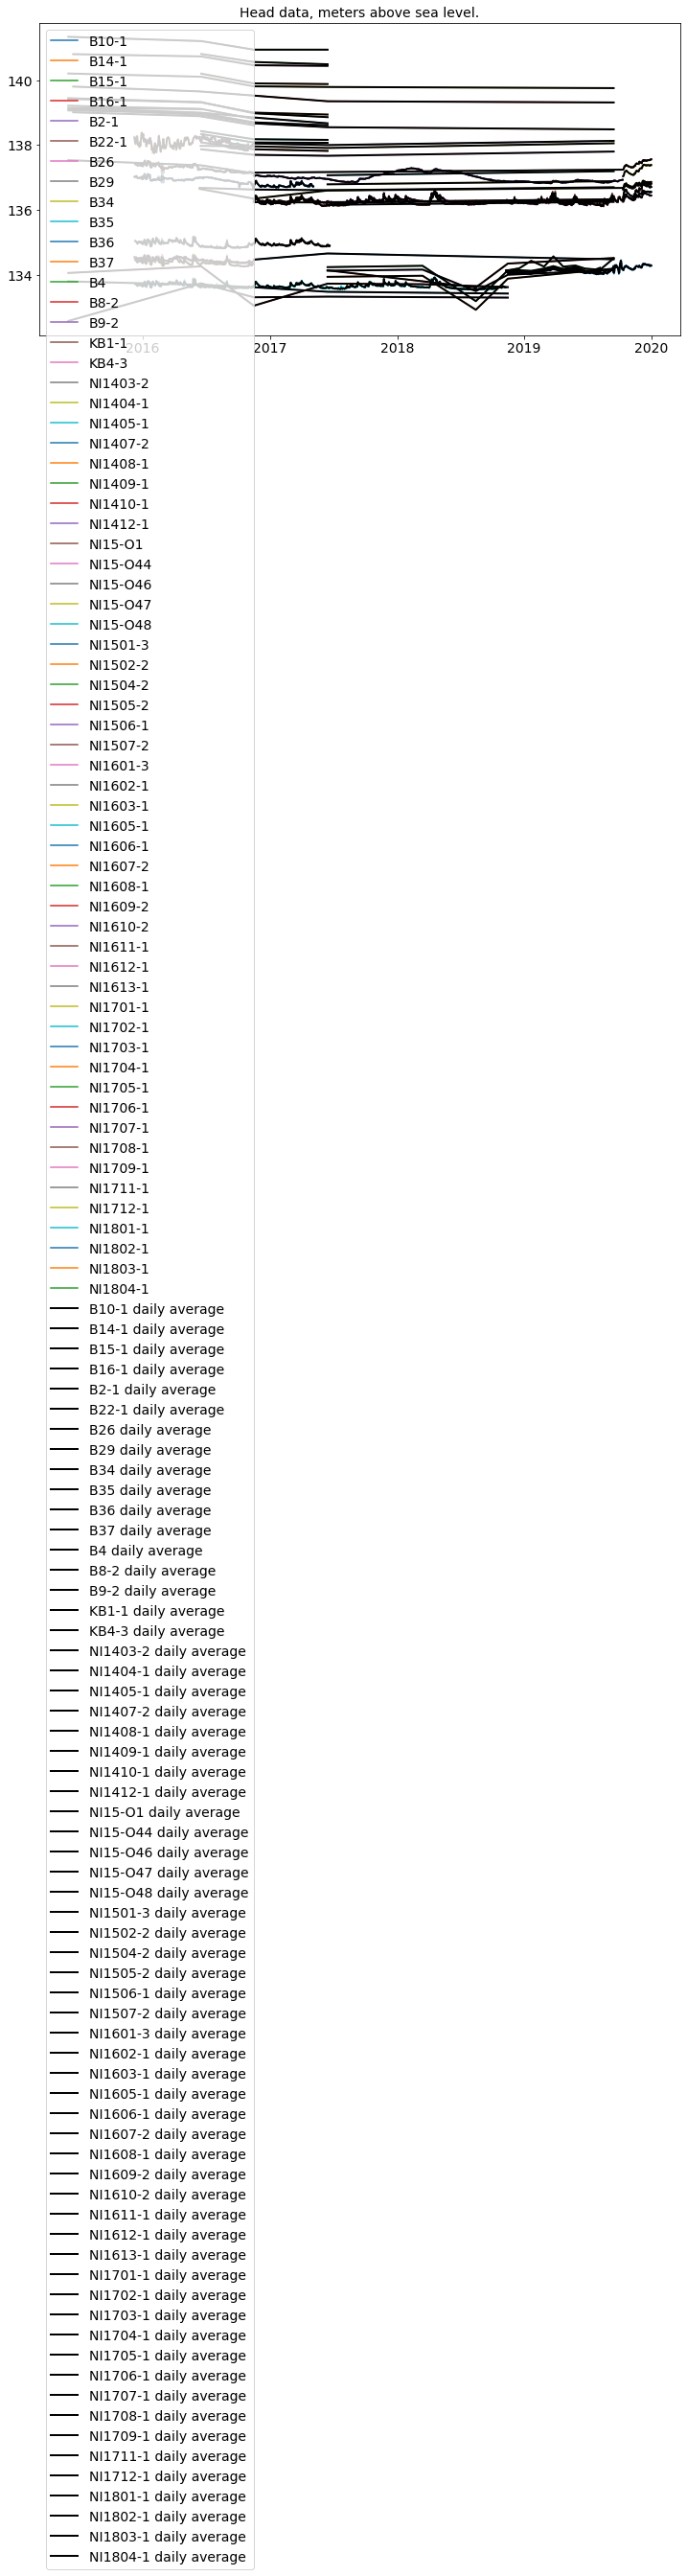

In [18]:
plt.figure(figsize=(12, 6))
for site in df['site'].unique():
    x = df.loc[df['site'] == site]['datetime']
    y = df.loc[df['site'] == site]['head']
    plt.plot(x, y, label=site)
for site in df_resampled['site'].unique():
    x = df_resampled.loc[df_resampled['site'] == site]['datetime']
    y = df_resampled.loc[df_resampled['site'] == site]['head']
    plt.plot(x, y, label=f'{site} daily average', color='black', linewidth=2)
plt.legend()
plt.title('Head data, meters above sea level.', fontsize=14)

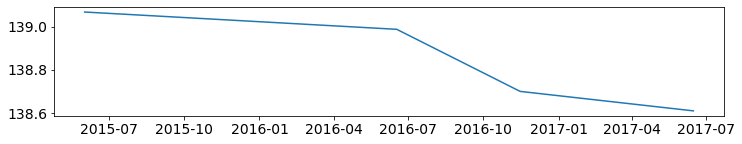

In [19]:
plt.figure(figsize=(12,2))
plt.plot(df_resampled.loc[df_resampled['site'] == 'NI1407-2']['datetime'], df_resampled.loc[df_resampled['site'] == 'NI1407-2']['head'])

Terrible, terrible plot. Anyways, it can be discerned that daily averages represent the raw data to a satisfactory degree, with the exception of a limited number of days where intra-day variations were substantial.

## Prepare datasets for OLPROC

In [20]:
df_resampled

,site,datetime,head,Unnamed: 2,Unnamed: 3
0,B10-1,2015-06-01,133.800,NaN,NaN
1,B10-1,2016-06-17,133.695,NaN,NaN
2,B10-1,2016-11-15,133.620,NaN,NaN
3,B10-1,2017-06-15,133.480,NaN,NaN
4,B10-1,2018-11-15,133.425,NaN,NaN
...,...,...,...,...,...
7951,NI1804-1,2019-03-26,134.268,NaN,NaN
7952,NI1804-1,2019-04-23,134.185,NaN,NaN
7953,NI1804-1,2019-05-28,134.240,NaN,NaN
7954,NI1804-1,2019-06-25,134.130,NaN,NaN


In [21]:
df_resampled.site = df_resampled.site.str.lower()

In [22]:
df_resampled

,site,datetime,head,Unnamed: 2,Unnamed: 3
0,b10-1,2015-06-01,133.800,NaN,NaN
1,b10-1,2016-06-17,133.695,NaN,NaN
2,b10-1,2016-11-15,133.620,NaN,NaN
3,b10-1,2017-06-15,133.480,NaN,NaN
4,b10-1,2018-11-15,133.425,NaN,NaN
...,...,...,...,...,...
7951,ni1804-1,2019-03-26,134.268,NaN,NaN
7952,ni1804-1,2019-04-23,134.185,NaN,NaN
7953,ni1804-1,2019-05-28,134.240,NaN,NaN
7954,ni1804-1,2019-06-25,134.130,NaN,NaN


In [23]:
loc_df = pd.read_csv(os.path.join(obs_dir, 'measurement_positions.csv'))
display(loc_df)

,name,x,y,type
0,b10-1,427074.7094,6654805.174,head
1,b14-1,427474.4248,6655148.009,head
2,b15-1,427480.5444,6655184.865,head
3,b16-1,427409.5473,6655023.271,head
4,b2-1,427384.1720,6655037.189,head
...,...,...,...,...
65,ni15-o46-stg,427316.2934,6655000.158,stage
66,ni15-o47-stg,427294.9467,6654962.316,stage
67,ni15-o48-stg,427166.6707,6654946.617,stage
68,gage-1,427070.6140,6654948.935,inflow


In [24]:
df_resampled['layer'] = 0
df_resampled

,site,datetime,head,Unnamed: 2,Unnamed: 3,layer
0,b10-1,2015-06-01,133.800,NaN,NaN,0
1,b10-1,2016-06-17,133.695,NaN,NaN,0
2,b10-1,2016-11-15,133.620,NaN,NaN,0
3,b10-1,2017-06-15,133.480,NaN,NaN,0
4,b10-1,2018-11-15,133.425,NaN,NaN,0
...,...,...,...,...,...,...
7951,ni1804-1,2019-03-26,134.268,NaN,NaN,0
7952,ni1804-1,2019-04-23,134.185,NaN,NaN,0
7953,ni1804-1,2019-05-28,134.240,NaN,NaN,0
7954,ni1804-1,2019-06-25,134.130,NaN,NaN,0


In [25]:
for well in df_resampled.site.unique():
    print(well)

b10-1
b14-1
b15-1
b16-1
b2-1
b22-1
b26
b29
b34
b35
b36
b37
b4
b8-2
b9-2
kb1-1
kb4-3
ni1403-2
ni1404-1
ni1405-1
ni1407-2
ni1408-1
ni1409-1
ni1410-1
ni1412-1
ni15-o1
ni15-o44
ni15-o46
ni15-o47
ni15-o48
ni1501-3
ni1502-2
ni1504-2
ni1505-2
ni1506-1
ni1507-2
ni1601-3
ni1602-1
ni1603-1
ni1605-1
ni1606-1
ni1607-2
ni1608-1
ni1609-2
ni1610-2
ni1611-1
ni1612-1
ni1613-1
ni1701-1
ni1702-1
ni1703-1
ni1704-1
ni1705-1
ni1706-1
ni1707-1
ni1708-1
ni1709-1
ni1711-1
ni1712-1
ni1801-1
ni1802-1
ni1803-1
ni1804-1


In [26]:
df_resampled

,site,datetime,head,Unnamed: 2,Unnamed: 3,layer
0,b10-1,2015-06-01,133.800,NaN,NaN,0
1,b10-1,2016-06-17,133.695,NaN,NaN,0
2,b10-1,2016-11-15,133.620,NaN,NaN,0
3,b10-1,2017-06-15,133.480,NaN,NaN,0
4,b10-1,2018-11-15,133.425,NaN,NaN,0
...,...,...,...,...,...,...
7951,ni1804-1,2019-03-26,134.268,NaN,NaN,0
7952,ni1804-1,2019-04-23,134.185,NaN,NaN,0
7953,ni1804-1,2019-05-28,134.240,NaN,NaN,0
7954,ni1804-1,2019-06-25,134.130,NaN,NaN,0


Perhaps a redundant step, but for brevities sake let's change the clock hour for each datetime entry from 00:00:00 to 12:00:00, to better reflect that data represent daily average stage:

In [27]:
df_resampled['datetime'] = [i.replace(hour=12) for i in df_resampled['datetime']]

In [28]:
#df = df_resampled.merge(loc_df, left_on='site', right_on='NAME')[['site', 'datetime', 'head', 'LAYER']]
#df

In [29]:
#df_lyr1 = df.loc[df['LAYER'] == 1]
#df_lyr2 = df.loc[df['LAYER'] == 2]
#df_lyr3 = df.loc[df['LAYER'] == 3]

OLPROC reads site sample files (ssf/smp), which is long format data. The following section describes the exportation of the resampled dataset to a site sample file using `pyemu.utils.smp_utils.dataframe_to_smp`

In [30]:
output_dir = os.path.join('..', '..', 'data', 'olproc_input')

Perhaps a redundant step, but for brevities sake let's change the clock hour for each `datetime` entry from `00:00:00` to `12:00:00`, to better reflect that data represent daily average stage:

In [31]:
#for df in [df_lyr1, df_lyr2, df_lyr3]:
#    df['datetime'] = [i.replace(hour=12) for i in df['datetime']]

In [32]:
#display(df_lyr1)

Export to smp-file (note that an alternative version below exports headobs per layer):

In [33]:
pyemu.utils.smp_utils.dataframe_to_smp(
    df_resampled,
    os.path.join(output_dir, 'obs-head-all.ssf'),
    name_col='site',
    datetime_col='datetime',
    value_col='head',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

---

## End of Notebook

Use `pyemu.utils.smp_utils.dataframe_to_smp` to create a site sample file:

In [34]:
#pyemu.utils.smp_utils.dataframe_to_smp(
#    df_lyr1[['site', 'datetime', 'head']],
#    os.path.join(output_dir, 'obs-head1.ssf'),
#    name_col='site',
#    datetime_col='datetime',
#    value_col='head',
#    datetime_format='dd/mm/yyyy',
#    value_format='{0:15.6E}',
#    max_name_len=12
#)

In [35]:
#pyemu.utils.smp_utils.dataframe_to_smp(
#    df_lyr2[['site', 'datetime', 'head']],
#    os.path.join(output_dir, 'obs-head2.ssf'),
#    name_col='site',
#    datetime_col='datetime',
#    value_col='head',
#    datetime_format='dd/mm/yyyy',
#    value_format='{0:15.6E}',
#    max_name_len=12
#)

In [36]:
#pyemu.utils.smp_utils.dataframe_to_smp(
#    df_lyr3[['site', 'datetime', 'head']],
#    os.path.join(output_dir, 'obs-head3.ssf'),
#    name_col='site',
#    datetime_col='datetime',
#    value_col='head',
#    datetime_format='dd/mm/yyyy',
#    value_format='{0:15.6E}',
#    max_name_len=12
#)

Done.